In [3]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'
settings_paths = [
  "settings/arpege_winter_30d.yaml", 
  "settings/arpege_summer_30d.yaml", 
  
  "settings/ifs_winter_30d.yaml" , 
  "settings/ifs_summer_30d.yaml" , 
  
  "settings/mpas_winter_30d.yaml", 
  "settings/mpas_summer_30d.yaml", 
  "settings/obs_winter_30d.yaml",
  "settings/obs_summer_30d.yaml",

  "settings/screamv1_winter_30d.yaml",
  "settings/screamv1_summer_30d.yaml", 
 
  "settings/sam_winter_30d.yaml", 
  "settings/sam_summer_30d.yaml", 
  "settings/um_winter_30d.yaml",
  "settings/um_summer_30d.yaml",

    "settings/xshield_winter_30d.yaml" , 
    "settings/fv3_summer_30d.yaml", 
    
    "settings/geos_winter_30d.yaml", 
    "settings/grist_winter_30d.yaml", 
    "settings/nicam_summer_30d.yaml", 
    ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]

## extreme distribs
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = False, dist_mask = False) for gr in grs]

jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = True, dist_mask = "ocean") for gr in grs]

jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = True, dist_mask = "land") for gr in grs]

## linear distrib
# jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = False, dist_bintype = "invlogQ") for gr in grs]

# jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = ocean, dist_bintype = "invlogQ") for gr in grs]

# jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = ~ocean, dist_bintype = "invlogQ") for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/va

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recom

## ranks - percentiles values

/tmp/ipykernel_2336233/1166312056.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(jds))


(0.0, 130.02251225292449)

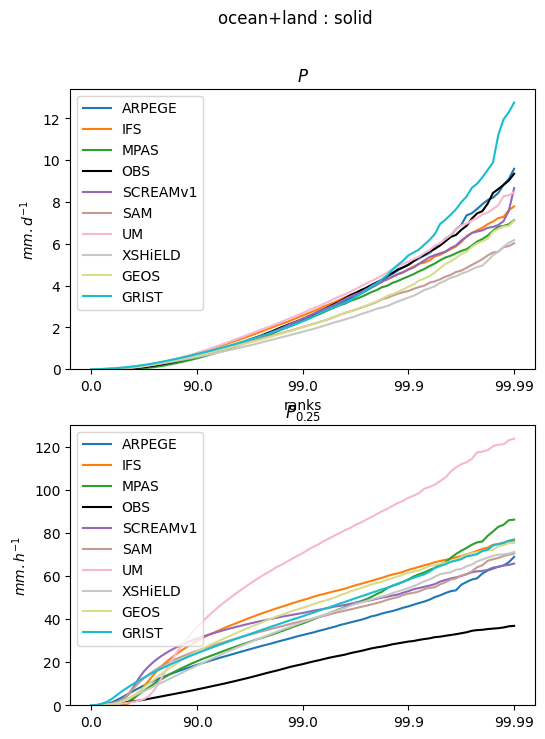

In [13]:
fig, axs = plt.subplots(2, 1, figsize = (6, 8))
# plt.suptitle("ocean : '--' ; land : '..', ocean+land : solid")
plt.suptitle("ocean+land : solid")

colors = plt.cm.get_cmap('tab20', len(jds))


# for idx, (jd, jd_ocean, jd_land) in enumerate(zip(jds, jds_ocean, jds_land)): 
for idx, jd, jd_ocean, jd_land in zip(np.arange(len(jds_ocean)), jds, jds_ocean, jds_land): 

    model, season = jd_ocean.name.split("_")[0], jd_ocean.name.split("_")[1]
    if season == "Winter":
        color = colors(idx) if model != "OBS" else  "black"
        x = np.arange(len(jd_ocean.dist1.ranks))

        axs[0].plot(x, jd.dist1.percentiles, label = model, color = color, linewidth = 1)
        axs[1].plot(x, jd.dist2.percentiles, label = model, color = color)
    # else : 

        # axs[0].plot(x, jd_ocean.dist1.percentiles,label = model, color = color, linestyle = '--')
        # axs[1].plot(x, jd_ocean.dist2.percentiles, label = model, color = color, linestyle = '--')

        # axs[0].plot(x, jd_land.dist1.percentiles,color = color, linestyle = 'dotted')
        # axs[1].plot(x, jd_land.dist2.percentiles, color = color, linestyle = 'dotted')

axs[0].legend()
axs[1].legend()

# axs[0].set_xticks(x[::10], np.round(jd.dist1.ranks[::10]))
# axs[1].set_xticks(x[::10], np.round(jd.dist2.ranks[::10]))

axs[0].set_xticks(x[::20], jd.dist1.ranks[::20])
axs[1].set_xticks(x[::20], jd.dist2.ranks[::20])

axs[0].set_title(r"$P$")
axs[1].set_title(r"$P_{0.25}$")

axs[0].set_xlabel(r"ranks")

axs[0].set_ylabel(r"$mm.d^{-1}$")
axs[1].set_ylabel(r"$mm.h^{-1}$")

axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)
# axs[0].set_xticklabels(np.round(jd.dist1.ranks, 3))
# axs[1].set_xticklabels(np.round(jd.dist2.ranks,3))
# axs[0].set_yscale('log')

/tmp/ipykernel_2333057/1748584955.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(jds))


ValueError: x and y must have same first dimension, but have shapes (81,) and (101,)

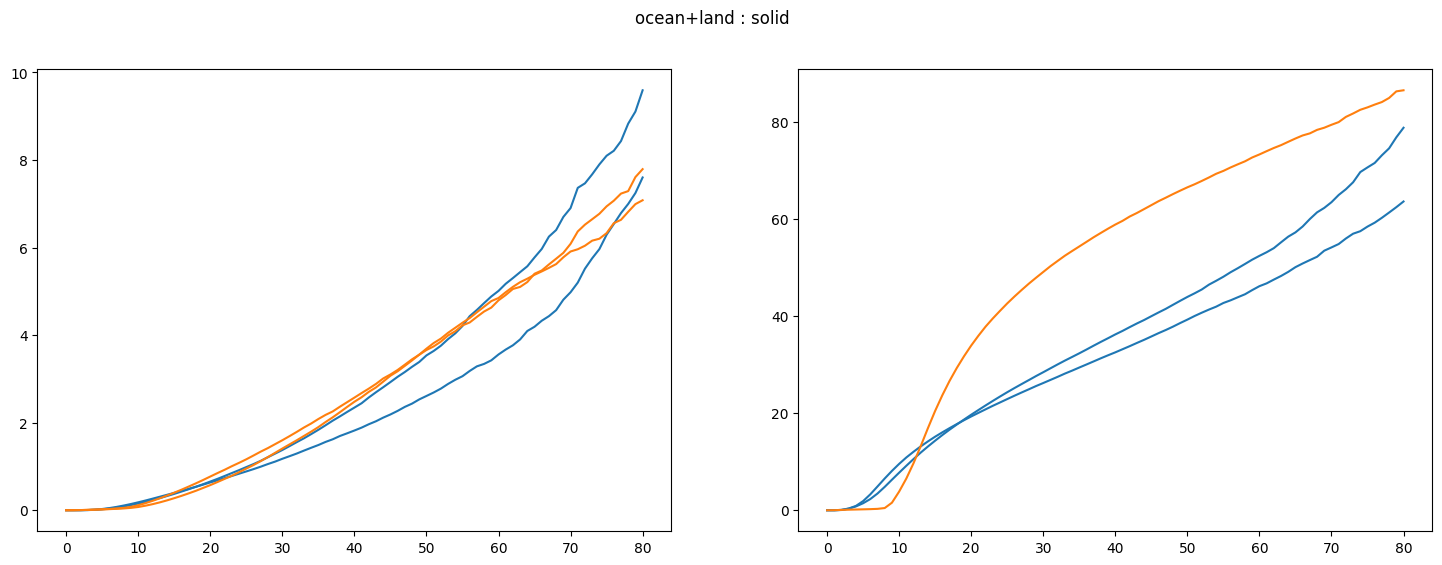

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (18, 6))
# plt.suptitle("ocean : '--' ; land : '..', ocean+land : solid")
plt.suptitle("ocean+land : solid")

colors = plt.cm.get_cmap('tab10', len(jds))


# for idx, (jd, jd_ocean, jd_land) in enumerate(zip(jds, jds_ocean, jds_land)): 
for idx, jd in enumerate(jds): 
    model = jd.name.split("_")[0]
    color = colors(idx) if model != "OBS" else  "black"
    x = np.arange(len(jd.dist1.ranks))
    axs[0].plot(x, jd.dist1.percentiles, label = model, color = color)
    axs[1].plot(x, jd.dist2.percentiles, label = model, color = color)

    # axs[0].plot(x, jd_ocean.dist1.percentiles,label = model, color = color, linestyle = '--')
    # axs[1].plot(x, jd_ocean.dist2.percentiles, label = model, color = color, linestyle = '--')

    # axs[0].plot(x, jd_land.dist1.percentiles,color = color, linestyle = 'dotted')
    # axs[1].plot(x, jd_land.dist2.percentiles, color = color, linestyle = 'dotted')

axs[0].legend()
axs[1].legend()

axs[0].set_xticks(x[::10], np.round(jd.dist1.ranks[::10]))
axs[1].set_xticks(x[::10], np.round(jd.dist2.ranks[::10]))

axs[0].set_title("Precip value for 1°x1day (mm/h) over distrib ranks")
axs[1].set_title("Precip value for km-scale $P_{0.15}$ (mm/h) over distrib ranks")

axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)
# axs[0].set_xticklabels(np.round(jd.dist1.ranks, 3))
# axs[1].set_xticklabels(np.round(jd.dist2.ranks,3))
# axs[0].set_yscale('log')

In [ ]:
jd.dist1.ranks

array([ 0.        ,  2.2762779 ,  4.5007414 ,  6.67456992,  8.79891606,
       10.87490619, 12.903641  , 14.88619618, 16.82362289, 18.71694838,
       20.56717653, 22.37528834, 24.1422425 , 25.86897587, 27.55640399,
       29.20542156, 30.81690291, 32.39170246, 33.9306552 , 35.4345771 ,
       36.90426555, 38.34049981, 39.74404139, 41.11563446, 42.45600627,
       43.76586748, 45.04591261, 46.29682036, 47.51925398, 48.7138616 ,
       49.88127664, 51.02211806, 52.13699077, 53.22648587, 54.29118104,
       55.33164078, 56.34841678, 57.34204812, 58.31306165, 59.26197222,
       60.18928294, 61.0954855 , 61.98106037, 62.84647709, 63.69219452,
       64.51866108, 65.32631495, 66.11558439, 66.88688785, 67.64063431,
       68.3772234 , 69.09704567, 69.8004828 , 70.48790773, 71.15968497,
       71.81617069, 72.45771297, 73.08465196, 73.69732008, 74.29604217,
       74.88113568, 75.45291084, 76.01167081, 76.55771185, 77.09132347,
       77.61278861, 78.12238376, 78.6203791 , 79.10703869, 79.58

In [ ]:
### Built sst_lagi
# # offset = 1
# sst = grs[-2].get_var_id_ds("sst")
# sst2 = sst.isel(days = slice(None, -offset))
# days2 = sst.days.values[offset:]
# sst2 = sst2.assign_coords(days=days2)

# # file = grs[-2].get_var_ds_file('sst')
# import os 

# file = f'/homedata/mcarenso/tempest/SAM_lowRes_Tropics/sst_lag{offset}.nc'
# os.remove(file)
# sst2.to_netcdf(file)

## Obs : winter vs summer & ocean vs land

In [5]:
settings_paths = [
    "settings/obs_summer_30d.yaml", 
    "settings/obs_winter_30d.yaml"
    ] 
 
hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]
## extreme distribs
# jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

# jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 20,  nd=5, overwrite = True, dist_mask = ocean) for gr in grs]

# jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 20,  nd=5, overwrite = True, dist_mask = ~ocean) for gr in grs]

## linear distrib
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False, dist_bintype = "invlogQ") for gr in grs]

jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = "ocean", dist_bintype = "invlogQ") for gr in grs]

jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = "land", dist_bintype = "invlogQ") for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
First instance of that distrib so Overwrite gets to true
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
First instance of that distrib so Overwrite gets to true
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
First instance of that distrib so Overwrite gets to true
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
First instance of that distrib so Overwrite gets to true
Overwrite set to true, so computing basics and saving them


(0.0, 62.6018220031977)

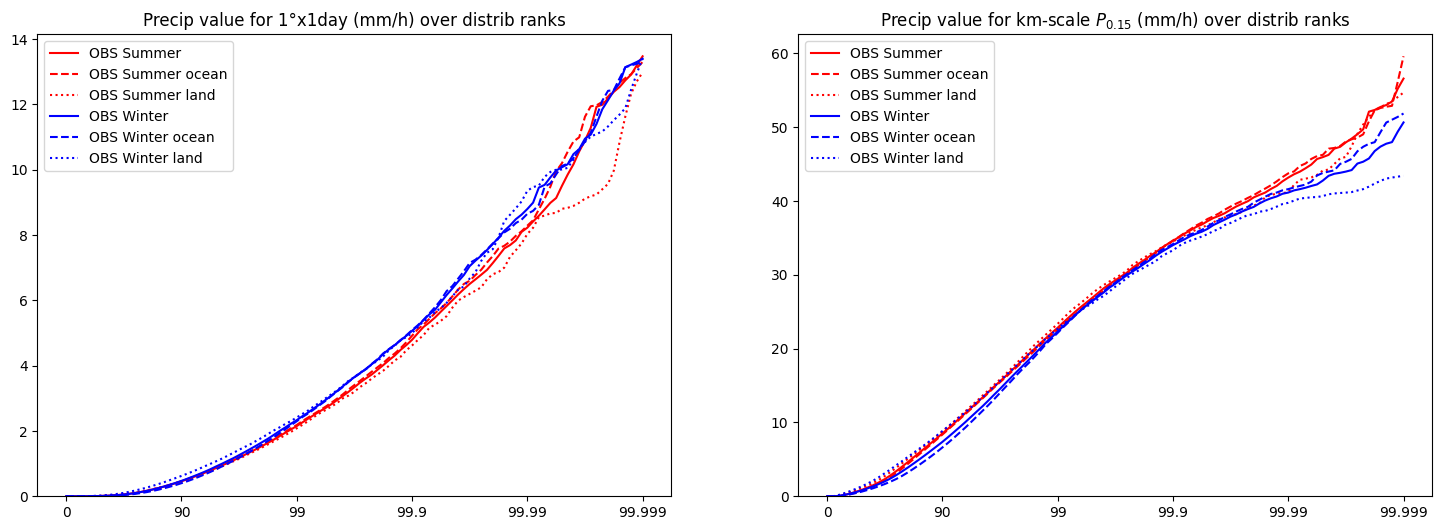

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (18, 6))
# plt.suptitle("ocean : '--' ; land : '..', ocean+land : solid")
colors = ["red", "blue"]


for idx, (jd, jd_ocean, jd_land) in enumerate(zip(jds, jds_ocean, jds_land)): 
    model = jd.name.split("_")[0]+" "+jd.name.split("_")[1]
    color = colors[idx]
    x = np.arange(len(jd.dist1.ranks))
    axs[0].plot(x, jd.dist1.percentiles, label = model, color = color)
    axs[1].plot(x, jd.dist2.percentiles, label = model, color = color)

    axs[0].plot(x, jd_ocean.dist1.percentiles,label = model+" ocean" , color = color, linestyle = '--')
    axs[1].plot(x, jd_ocean.dist2.percentiles, label = model+" ocean", color = color, linestyle = '--')

    axs[0].plot(x, jd_land.dist1.percentiles, color = color, label = model+" land", linestyle = 'dotted')
    axs[1].plot(x, jd_land.dist2.percentiles, color = color, label = model+" land", linestyle = 'dotted')

axs[0].legend()
axs[1].legend()

# axs[0].set_xticks(x[::10], np.round(jd.dist1.ranks[::10]))
# axs[1].set_xticks(x[::10], np.round(jd.dist2.ranks[::10]))

ranks = np.array([ "0", "90", "99", "99.9", "99.99", "99.999"])
axs[0].set_xticks(x[::20])
axs[1].set_xticks(x[::20])

axs[0].set_xticklabels(ranks)
axs[1].set_xticklabels(ranks)


axs[0].set_title("Precip value for 1°x1day (mm/h) over distrib ranks")
axs[1].set_title("Precip value for km-scale $P_{0.15}$ (mm/h) over distrib ranks")

axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)

# axs[0].set_yscale('log')

In [9]:
##
# settings_path = 'settings/sam_4km_30min_30d.yaml'
# "settings/arpege_summer_30d.yaml",
#"settings/fv3_summer_30d.yaml"  ,
settings_paths = [ 
                #  "settings/arpege_summer_30d.yaml", "settings/fv3_summer_30d.yaml", "settings/ifs_summer_30d.yaml", 
                #     "settings/mpas_summer_30d.yaml", "settings/nicam_summer_30d.yaml", 
                    "settings/obs_summer_30d.yaml", 
                    "settings/obsv7_summer_30d.yaml", 
                #     "settings/sam_summer_30d.yaml", 
                #     "settings/um_summer_30d.yaml"
                # 'settings/sam_4km_30min_30d.yaml'
                ]
# settings_paths = ["settings/nicam_summer_30d.yaml",  "settings/um_summer_30d.yaml"]
# settings_paths = [ "settings/sam_4km_30min_30d.yaml"]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]
## extreme distribs
# jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

# jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 20,  nd=5, overwrite = True, dist_mask = ocean) for gr in grs]

# jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 20,  nd=5, overwrite = True, dist_mask = ~ocean) for gr in grs]

## linear distrib
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False, dist_bintype = "invlogQ") for gr in grs]

jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = ocean, dist_bintype = "invlogQ") for gr in grs]

jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = ~ocean, dist_bintype = "invlogQ") for gr in grs]

Data loaded from /homedata/mcarenso/tempest/OBS_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/OBSv7_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/OBS_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/OBSv7_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/tmp/ipykernel_4022289/3410311291.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(jds))


[Text(0, 0, '0.0'),
 Text(20, 0, '90.0'),
 Text(40, 0, '99.0'),
 Text(60, 0, '99.9'),
 Text(80, 0, '99.99'),
 Text(100, 0, '99.99900000000001')]

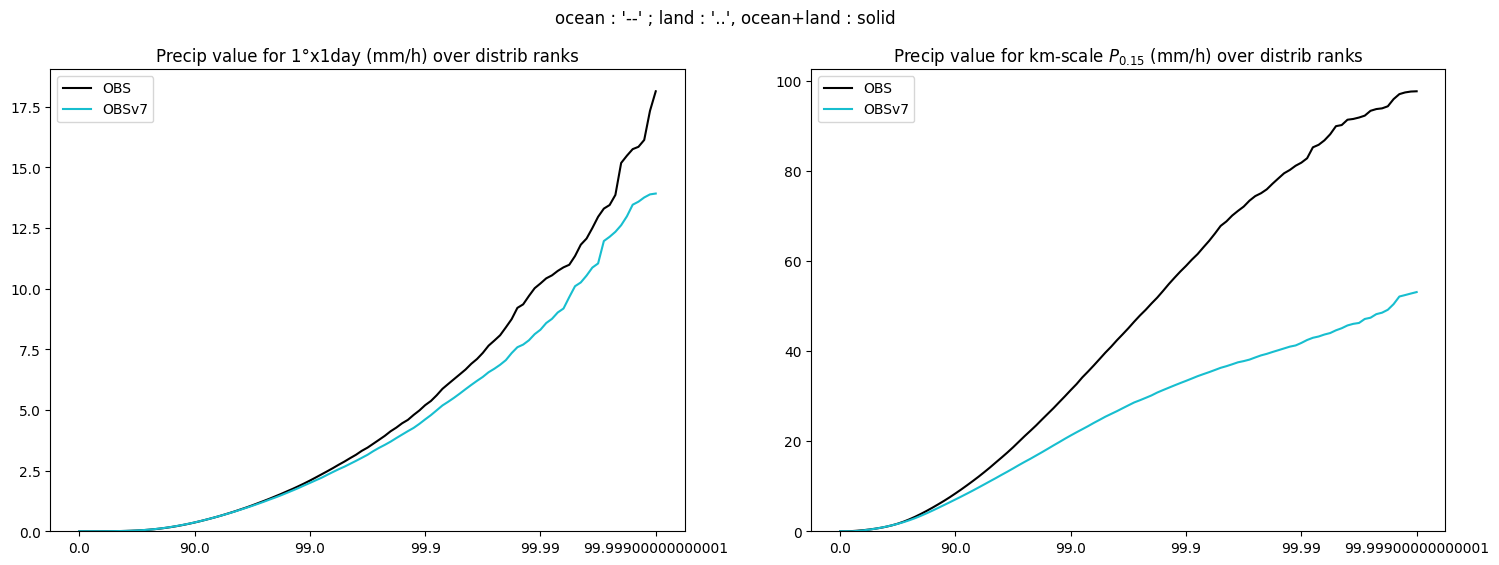

In [32]:
fig, axs = plt.subplots(1, 2, figsize = (18, 6))
plt.suptitle("ocean : '--' ; land : '..', ocean+land : solid")
colors = plt.cm.get_cmap('tab10', len(jds))


for idx, (jd, jd_ocean, jd_land) in enumerate(zip(jds, jds_ocean, jds_land)): 
    model = jd.name.split("_")[0]
    color = colors(idx) if model != "OBS" else  "black"
    x = np.arange(len(jd.dist1.ranks))
    axs[0].plot(x, jd.dist1.percentiles, label = model, color = color)
    axs[1].plot(x, jd.dist2.percentiles, label = model, color = color)

    # axs[0].plot(x, jd_ocean.dist1.percentiles,label = model, color = color, linestyle = '--')
    # axs[1].plot(x, jd_ocean.dist2.percentiles, label = model, color = color, linestyle = '--')

    # axs[0].plot(x, jd_land.dist1.percentiles,color = color, linestyle = 'dotted')
    # axs[1].plot(x, jd_land.dist2.percentiles, color = color, linestyle = 'dotted')

axs[0].legend()
axs[1].legend()

# axs[0].set_xticks(x[::10], np.round(jd.dist1.ranks[::10]))
# axs[1].set_xticks(x[::10], np.round(jd.dist2.ranks[::10]))

ranks = np.array([ 0.   , 90.   , 99.   , 99.9  , 99.99 , 99.999])
axs[0].set_xticks(x[::20], ranks)
axs[1].set_xticks(x[::20], ranks)

axs[0].set_title("Precip value for 1°x1day (mm/h) over distrib ranks")
axs[1].set_title("Precip value for km-scale $P_{0.15}$ (mm/h) over distrib ranks")

axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)

axs[0].set_xticklabels(jd.dist1.ranks[::20])
axs[1].set_xticklabels( jd.dist2.ranks[::20])
# axs[0].set_yscale('log')

In [29]:
jd.dist1.ranks[::20]

array([ 0.   , 90.   , 99.   , 99.9  , 99.99 , 99.999])

In [26]:
x[::10]

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [22]:
jd.dist1.ranks

array([ 0.        , 10.87490619, 20.56717653, 29.20542156, 36.90426555,
       43.76586748, 49.88127664, 55.33164078, 60.18928294, 64.51866108,
       68.3772234 , 71.81617069, 74.88113568, 77.61278861, 80.04737685,
       82.2172059 , 84.15106808, 85.87462455, 87.41074588, 88.77981546,
       90.        , 91.08749062, 92.05671765, 92.92054216, 93.69042656,
       94.37658675, 94.98812766, 95.53316408, 96.01892829, 96.45186611,
       96.83772234, 97.18161707, 97.48811357, 97.76127886, 98.00473769,
       98.22172059, 98.41510681, 98.58746246, 98.74107459, 98.87798155,
       99.        , 99.10874906, 99.20567177, 99.29205422, 99.36904266,
       99.43765867, 99.49881277, 99.55331641, 99.60189283, 99.64518661,
       99.68377223, 99.71816171, 99.74881136, 99.77612789, 99.80047377,
       99.82217206, 99.84151068, 99.85874625, 99.87410746, 99.88779815,
       99.9       , 99.91087491, 99.92056718, 99.92920542, 99.93690427,
       99.94376587, 99.94988128, 99.95533164, 99.96018928, 99.96